## Neural Networks 

Below are the functions to compute neural network:

We work on three datasets that are large, medium and small. We have train and test datasets for each of these.

In [3]:
import os
import numpy as np
from pathlib import Path


# This is a function to load the small dataset.

def load_data_small():
    """ Load small training and validation dataset

        Returns a tuple of length 4 with the following objects:
        X_train: An N_train-x-M ndarray containing the training data (N_train examples, M features each)
        y_train: An N_train-x-1 ndarray contraining the labels
        X_val: An N_val-x-M ndarray containing the training data (N_val examples, M features each)
        y_val: An N_val-x-1 ndarray contraining the labels
    """
    #script_dir = Path(__file__).parent
    script_dir = Path(os.path.dirname(os.path.abspath("/Users/apple/Desktop/Spring24/ML/Proj_2/project2-programming/data")))

    
    train_all = np.loadtxt(f'{script_dir}/data/smallTrain.csv', dtype=int, delimiter=',')
    valid_all = np.loadtxt(f'{script_dir}/data/smallValidation.csv', dtype=int, delimiter=',')

    X_train = train_all[:, 1:]
    y_train = train_all[:, 0]
    X_val = valid_all[:, 1:]
    y_val = valid_all[:, 0]
    
    return (X_train, y_train, X_val, y_val)

# This is a function to load medium dataset.

def load_data_medium():
    """ Load medium training and validation dataset

        Returns a tuple of length 4 with the following objects:
        X_train: An N_train-x-M ndarray containing the training data (N_train examples, M features each)
        y_train: An N_train-x-1 ndarray contraining the labels
        X_val: An N_val-x-M ndarray containing the training data (N_val examples, M features each)
        y_val: An N_val-x-1 ndarray contraining the labels
    """
    #script_dir = Path(__file__).parent
    script_dir = Path(os.path.dirname(os.path.abspath("/Users/apple/Desktop/Spring24/ML/Proj_2/project2-programming/data")))

    train_all = np.loadtxt(f'{script_dir}/data/mediumTrain.csv', dtype=int, delimiter=',')
    valid_all = np.loadtxt(f'{script_dir}/data/mediumValidation.csv', dtype=int, delimiter=',')

    X_train = train_all[:, 1:]
    y_train = train_all[:, 0]
    X_val = valid_all[:, 1:]
    y_val = valid_all[:, 0]

    return (X_train, y_train, X_val, y_val)

# This is a function to load large dataset.

def load_data_large():
    """ Load large training and validation dataset

        Returns a tuple of length 4 with the following objects:
        X_train: An N_train-x-M ndarray containing the training data (N_train examples, M features each)
        y_train: An N_train-x-1 ndarray contraining the labels
        X_val: An N_val-x-M ndarray containing the training data (N_val examples, M features each)
        y_val: An N_val-x-1 ndarray contraining the labels
    """
    #script_dir = Path(__file__).parent
    script_dir = Path(os.path.dirname(os.path.abspath("/Users/apple/Desktop/Spring24/ML/Proj_2/project2-programming/data")))

    train_all = np.loadtxt(f'{script_dir}/data/largeTrain.csv', dtype=int, delimiter=',')
    valid_all = np.loadtxt(f'{script_dir}/data/largeValidation.csv', dtype=int, delimiter=',')

    X_train = train_all[:, 1:]
    y_train = train_all[:, 0]
    X_val = valid_all[:, 1:]
    y_val = valid_all[:, 0]

    return (X_train, y_train, X_val, y_val)


def linearForward(input, p):
    """
    :param input: input vector (column vector) WITH bias feature added
    :param p: parameter matrix (alpha/beta) WITH bias parameter added
    :return: output vector
    """
    
    result = np.matmul(p, input)

    return result


def sigmoidForward(a):
    """
    :param a: input vector WITH bias feature added
    """
    result = 1/(1+np.exp(-a))

    return result


def softmaxForward(b):
    """
    Arguments:
        - b: input vector (N, dim)

    Returns:
        - output vector (N, dim)
    """

    result = np.exp(b)/np.sum(np.exp(b))
    return result


def crossEntropyForward(hot_y, y_hat):
    """
    :param hot_y: 1-hot vector for true label
    :param y_hat: vector of probabilistic distribution for predicted label
    :return: float
    """
    result = -np.sum(hot_y * np.log(y_hat))
    return result


def NNForward(x, y, alpha, beta):
    """
    :param x: input data (column vector) WITH bias feature added
    :param y: input (true) labels
    :param alpha: alpha WITH bias parameter added
    :param beta: beta WITH bias parameter added
    :return: all intermediate quantities x, a, z, b, y, J -- refer to writeup for details
    TIP: Check on your dimensions. Did you make sure all bias features are added
    """
    
    one_hot_y = np.zeros((beta.shape[0], 1))
    
    one_hot_y[y] = 1 
    
    a = linearForward(x, alpha)
    
    z = sigmoidForward(a)
       
    z_bias = np.concatenate((np.ones((1, z.shape[1])), z), axis=0)
    
    b = linearForward(z_bias, beta)
    
    y_hat = softmaxForward(b)

    J = crossEntropyForward(one_hot_y, y_hat)
    
    return x,a,z_bias,b,y_hat,J

def softmaxBackward(hot_y, y_hat):
    """
    :param hot_y: 1-hot vector for true label
    :param y_hat: vector of probabilistic distribution for predicted label
    """
    return y_hat - hot_y


def linearBackward(prev, p, grad_curr):
    """
    :param prev: previous layer WITH bias feature
    :param p: parameter matrix (alpha/beta) WITH bias parameter
    :param grad_curr: gradients for current layer
    :return:
        - grad_param: gradients for parameter matrix (alpha/beta)
        - grad_prevl: gradients for previous layer
    TIP: Check your dimensions.
    """
    
    if prev.shape[0] != 1:
        grad_param = np.matmul(grad_curr, prev.T)
        p_removed = np.delete(p,0,1)
        grad_prevl = np.matmul(p_removed.T, grad_curr)

    else:
        grad_param = np.matmul(grad_curr, prev)
        p_removed = np.delete(p,0,1)
        grad_prevl = np.matmul(p_removed.T, grad_curr)
    
    return grad_param, grad_prevl


def sigmoidBackward(curr, grad_curr):
    """
    :param curr: current layer WITH bias feature
    :param grad_curr: gradients for current layer
    :return: grad_prevl: gradients for previous layer
    TIP: Check your dimensions
    """
    curr_new = curr[1:, :]
    
    return np.multiply(np.multiply(grad_curr, curr_new), (1-curr_new))



def NNBackward(x, y, alpha, beta, z, y_hat):
    """
    :param x: input data (column vector) WITH bias feature added
    :param y: input (true) labels
    :param alpha: alpha WITH bias parameter added
    :param beta: alpha WITH bias parameter added
    :param z: z as per writeup
    :param y_hat: vector of probabilistic distribution for predicted label
    :return:
        - grad_alpha: gradients for alpha
        - grad_beta: gradients for beta
        - g_b: gradients for layer b (softmaxBackward)
        - g_z: gradients for layer z (linearBackward)
        - g_a: gradients for layer a (sigmoidBackward)
    """
    # Convert y to one-hot encoding
    # y_one_hot =
    
    # Gradient of Cross Entropy Loss w.r.t. y_hat
    # g_y_hat =
    
    # Gradient of Loss w.r.t. beta (Weights from hidden to output layer)
    # grad_beta, g_b = 
    
    # Gradient of Loss w.r.t. activation before sigmoid (a)
    # g_a =
    
    # Gradient of Loss w.r.t. alpha (Weights from input to hidden layer)
    # grad_alpha, g_x =
    
    # return grad_alpha, grad_beta, g_y_hat, g_b_no_bias, g_a

    one_hot_y = np.zeros((beta.shape[0], 1))
    
    one_hot_y[y] = 1
    
    g_b = softmaxBackward(one_hot_y, y_hat)
   
    g_beta, g_z = linearBackward(z, beta, g_b)
    
    g_a = sigmoidBackward(z, g_z)
    
    g_alpha, g_x = linearBackward(x, alpha, g_a)
    
    return g_alpha, g_beta, g_b, g_z, g_a

def SGD(tr_x, tr_y, valid_x, valid_y, hidden_units, num_epoch, init_flag, learning_rate):
    """
    :param tr_x: Training data input (size N_train x M)
    :param tr_y: Training labels (size N_train x 1)
    :param tst_x: Validation data input (size N_valid x M)
    :param tst_y: Validation labels (size N_valid x 1)
    :param hidden_units: Number of hidden units
    :param num_epoch: Number of epochs
    :param init_flag:
        - True: Initialize weights to random values in Uniform[-0.1, 0.1], bias to 0
        - False: Initialize weights and bias to 0
    :param learning_rate: Learning rate
    :return:
        - alpha weights
        - beta weights
        - train_entropy (length num_epochs): mean cross-entropy loss for training data for each epoch
        - valid_entropy (length num_epochs): mean cross-entropy loss for validation data for each epoch
    """

    M = tr_x.shape[1]
    D = hidden_units
    K = 10
      
    if init_flag:
        alpha = np.random.uniform(-0.1,0.1 , size = (D,M))
        
        alpha_1 = np.hstack((np.ones((alpha.shape[0],1)),alpha))
        
        beta = np.random.uniform(-0.1,0.1, size = (K,D))
        
        beta_1 = np.hstack((np.ones((beta.shape[0],1)),beta))
        
    else:
        alpha_1 = np.zeros((D, M+1))
        beta_1 = np.zeros((K, D+1))
        
    # alpha_1 and beta_1 are the weight matrices which have bias column in them.
    # initially the shape of the tr_x is (500,128), we add a column of ones and make it (500,129)
    # same goes with the validation set
    
    
    tr_x_new = np.insert(tr_x,0,1,axis=1) #(N, M+1)
    
    valid_x_new = np.insert(valid_x,0,1,axis=1)
    
    loss_of_train =  np.zeros(num_epoch)
    
    loss_of_test =  np.zeros(num_epoch)
        
    for ele in range(num_epoch):
        
        for i in range(tr_x.shape[0]): # iterating 500 times for 500 rows(images)
            
            # taking each row as an input to the NNForward
            
            x,a,z,b,y_hat,J = NNForward(tr_x_new[[i]].T, tr_y[[i]], alpha_1, beta_1)
                       
            g_alpha, g_beta, g_b, g_z, g_a = NNBackward(tr_x_new[[i]].T,tr_y[[i]], alpha_1, beta_1, z, y_hat)
            
            # updating the aplha and beta matrices by learning rate
            
            alpha_1 = alpha_1 - learning_rate * g_alpha
            
            beta_1 = beta_1 - learning_rate * g_beta
        
        
        
        loss1 = 0
        loss2 = 0


        for j in range(tr_x.shape[0]): # This is executed for the number of rows.
            x,a,z,b,y_hat,J = NNForward(tr_x_new[[j]].T, tr_y[[j]], alpha_1, beta_1)
            y_1 = np.zeros((beta_1.shape[0],tr_y[j].size))
            y_1[tr_y[j]] = 1
            loss1 += crossEntropyForward(y_1, y_hat)
            
        loss1 = loss1 / tr_x.shape[0]   # taking average of all the cross entropies for training set

        
        for j in range(valid_x.shape[0]):
            x,a,z,b,y_hat,J = NNForward(valid_x_new[[j]].T, valid_y[[j]], alpha_1, beta_1)           
            y_1 = np.zeros((beta_1.shape[0],valid_y[j].size))
            y_1[valid_y[j]] = 1  
            loss2 +=  crossEntropyForward(y_1, y_hat)

        loss2 = loss2 /  valid_x.shape[0] # taking average of all the cross entropies for validation set
        

        loss_of_train[ele] = loss1  # we append the value of avergae cross entropy each time for each value of epoch 
        loss_of_test[ele] = loss2
    
    return alpha_1, beta_1, loss_of_train, loss_of_test


def prediction(tr_x, tr_y, valid_x, valid_y, tr_alpha, tr_beta):
    """
    :param tr_x: Training data input (size N_train x M)
    :param tr_y: Training labels (size N_train x 1)
    :param valid_x: Validation data input (size N_valid x M)
    :param valid_y: Validation labels (size N-valid x 1)
    :param tr_alpha: Alpha weights WITH bias
    :param tr_beta: Beta weights WITH bias
    :return:
        - train_error: training error rate (float)
        - valid_error: validation error rate (float)
        - y_hat_train: predicted labels for training data
        - y_hat_valid: predicted labels for validation data
    """

    tr_x_new = np.insert(tr_x,0,1,axis=1) #(N, M+1)
    valid_x_new = np.insert(valid_x,0,1,axis=1)
    
    training_prediction = np.zeros(tr_x.shape[0])
    testing_prediction = np.zeros(valid_x.shape[0])
    
    
    for i in range(tr_x.shape[0]):
        
        x,a,z,b,y_hat,J = NNForward(tr_x_new[[i]].T, tr_y[[i]], tr_alpha, tr_beta)
        y_pred = np.argmax(y_hat)
        training_prediction [i] = y_pred
        
    for i in range(valid_x.shape[0]):
        x,a,z,b,y_hat,J = NNForward(valid_x_new[[i]].T, valid_y[[i]], tr_alpha, tr_beta)
        y_pred = np.argmax(y_hat)
        testing_prediction[i] = y_pred
         
    
    train_error = np.mean(training_prediction  != tr_y)
    valid_error =  np.mean(testing_prediction != valid_y)


    return train_error, valid_error, training_prediction , testing_prediction


def train_and_valid(X_train, y_train, X_val, y_val, num_epoch, num_hidden, init_rand, learning_rate):
    """ Main function to train and validate your neural network implementation.

        X_train: Training input in N_train-x-M numpy nd array. Each value is binary, in {0,1}.
        y_train: Training labels in N_train-x-1 numpy nd array. Each value is in {0,1,...,K-1},
            where K is the number of classes.
        X_val: Validation input in N_val-x-M numpy nd array. Each value is binary, in {0,1}.
        y_val: Validation labels in N_val-x-1 numpy nd array. Each value is in {0,1,...,K-1},
            where K is the number of classes.
        num_epoch: Positive integer representing the number of epochs to train (i.e. number of
            loops through the training data).
        num_hidden: Positive integer representing the number of hidden units.
        init_flag: Boolean value of True/False
        - True: Initialize weights to random values in Uniform[-0.1, 0.1], bias to 0
        - False: Initialize weights and bias to 0
        learning_rate: Float value specifying the learning rate for SGD.

        RETURNS: a tuple of the following six objects, in order:
        loss_per_epoch_train (length = num_epochs): A list of float values containing the mean cross entropy on training data after each SGD epoch
        loss_per_epoch_val (length =  num_epochs): A list of float values containing the mean cross entropy on validation data after each SGD epoch
        err_train: Float value containing the training error after training (equivalent to 1.0 - accuracy rate)
        err_val: Float value containing the validation error after training (equivalent to 1.0 - accuracy rate)
        y_hat_train: A list of integers representing the predicted labels for training data
        y_hat_val: A list of integers representing the predicted labels for validation data
    """
    ### YOUR CODE HERE
    
    loss_per_epoch_train = []
    loss_per_epoch_val = []
    err_train = None
    err_val = None
    y_hat_train = None
    y_hat_val = None
  
    alpha, beta, loss_per_epoch_train, loss_per_epoch_val = SGD(X_train, y_train, X_val, y_val, num_hidden, num_epoch, init_rand, learning_rate)
    err_train, err_val, y_hat_train, y_hat_val = prediction(X_train, y_train, X_val, y_val, alpha, beta)

    return (loss_per_epoch_train,
            loss_per_epoch_val,
            err_train,
            err_val,
            y_hat_train,
            y_hat_val)




Loading small dataset 

In [5]:
X_train_s, y_train_s, X_val_s, y_val_s = load_data_small()

In [6]:
X_train_s

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
len(X_train_s[0])

128

In [8]:
epochs = 20
init_rand = True
learning_rate = 0.01
hidden_units = 10
loss_train,loss_val, e_t,e_v,y_hat_train,y_hat_val = train_and_valid(X_train_s, y_train_s, X_val_s, y_val_s, epochs, hidden_units, init_rand, learning_rate)


[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]]
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]
[[1.]
 [0.]
 [0.]
 [0.]


 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]

NameError: name 'sd' is not defined

Using train_and_valid function to compute the neural networks.

In [45]:
num_epoch = 50
init_rand = True
learning_rate = 0.01
hidden_units = [5,20,50,100,200]
average_train = [] # losses with training set
average_val = []   # losses with validation set

for i in hidden_units:
    loss_train,loss_val, e_t,e_v,y_hat_train,y_hat_val = train_and_valid(X_train_s, y_train_s, X_val_s, y_val_s, num_epoch, i, init_rand, learning_rate)
    ave_1 = np.sum(loss_train) / len(loss_train)
    ave_2 =  np.sum(loss_val) / len(loss_val)
    average_train.append(ave_1)
    average_val.append(ave_2)


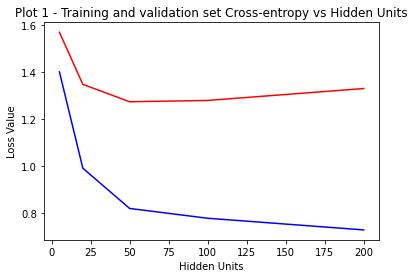

In [46]:
import matplotlib.pyplot as plt
plt.plot(hidden_units, average_train, c = "blue")
plt.plot(hidden_units, average_val, c = "red")
plt.xlabel("Hidden Units")
plt.ylabel("Loss Value")
plt.title("Plot 1 - Training and validation set Cross-entropy vs Hidden Units")
plt.show()


By changing the hidden units we observe same behaviour of the graph. Initially both
the data sets tend to have large loss values, then gradually by increasing the number of
hidden units loss tends to decrease. We observed the loss to be declining from 20
hidden units. And from there the loss is constant till 200, although there is a slight
increase at 200 hidden units.

In [48]:
# running the model with learning rate 0.1 for both the sets over number of epochs

epoch = [i for i in range(1,50,1)]
init_rand = True
learning_rate = 0.1
units = 50
average_train = []
average_loss = []

for i in epoch:
    loss_train,loss_val, e_t,e_v,y_hat_train,y_hat_val = train_and_valid(X_train_s, y_train_s, X_val_s, y_val_s, i, units, init_rand, learning_rate)
    ave_1 = np.sum(loss_train) / len(loss_train)
    ave_2 =  np.sum(loss_val) / len(loss_val)
    average_train.append(ave_1)
    average_loss.append(ave_2)
    

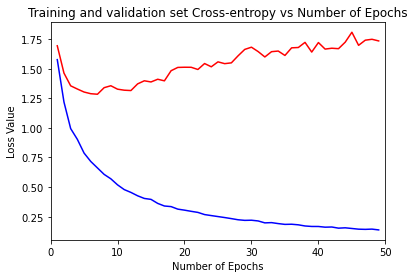

In [49]:
plt.plot(epoch, average_train, c = "blue")
plt.plot(epoch, average_loss, c = "red")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss Value")
plt.title("Training and validation set Cross-entropy vs Number of Epochs")
plt.xlim([0,50])
plt.show()

The blue line represents the training loss, which decreases steadily and reaches a low value.
The red line represents the validation loss, which initially decreases but then starts to increase and shows fluctuations as the number of epochs increases.
This behavior indicates that the model is overfitting. Overfitting occurs when the model performs well on the training data (low training loss) but poorly on the validation data (increasing validation loss). This suggests that the model is learning the noise and details of the training data rather than generalizing to unseen data.

In [50]:

learning_rate = 0.01
average_train_3 = []
average_loss_3 = []

for i in epoch:
    loss_train,loss_val, e_t,e_v,y_hat_train,y_hat_val = train_and_valid(X_train_s, y_train_s, X_val_s, y_val_s, i, units, init_rand, learning_rate)
    ave_1 = np.sum(loss_train) / len(loss_train)
    ave_2 =  np.sum(loss_val) / len(loss_val)
    average_train_3.append(ave_1)
    average_loss_3.append(ave_2)
    


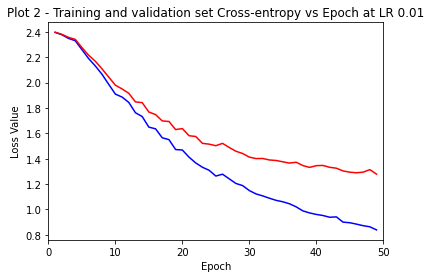

In [51]:
    
plt.plot(epoch, average_train_3, c = "blue")
plt.plot(epoch, average_loss_3, c = "red")
plt.xlim([0,50])
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.title("Plot 2 - Training and validation set Cross-entropy vs Epoch at LR 0.01")
plt.show()

In [53]:
learning_rate = 0.001
average_train_2 = []
average_loss_2 = []

for i in epoch:
    loss_train,loss_val, e_t,e_v,y_hat_train,y_hat_val = train_and_valid(X_train_s, y_train_s, X_val_s, y_val_s, i, units, init_rand, learning_rate)
    ave_1 = np.sum(loss_train) / len(loss_train)
    ave_2 =  np.sum(loss_val) / len(loss_val)
    average_train_2.append(ave_1)
    average_loss_2.append(ave_2)
    


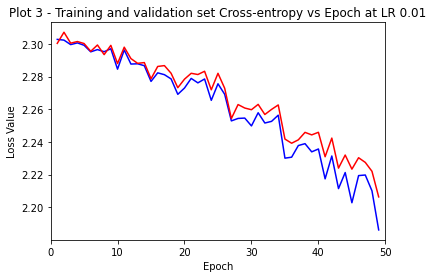

In [54]:
    
plt.plot(epoch, average_train_2, c = "blue")
plt.plot(epoch, average_loss_2, c = "red")
plt.xlim([0,50])
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.title("Plot 3 - Training and validation set Cross-entropy vs Epoch at LR 0.01")
plt.show()

At learning rate 0.1:

Here we see that the training set shows a correct flow of average losses. It initially has large values and gradually decreased as the model is learning. But, for the validation set the model shows many fluctuations.

At learning rate 0.01:

Here for the validation set the graph is in the direction of training set loss. This means the model is a little closer in predicting the actual values.

At learning rate 0.001:

Here we see that the model gives similar values for the training and validation sets. This means the model is predicting accurate values although there is a negligible difference when the epoch is 10 and high.

This means our model is over fitting for the learning rate 0.1, and it under fitting at the learning rate 0.01. And for the learning rate 0.001 the model is managing to correctly fit.

The optimal values from the model would be :

learning rate = 0.001

number of hidden units = 100

running over number of epochs = 50

For the above values the neural network gives sufficient average loss values.

For learning rate 0.01 the model is over-fitting and for the learning rate 0.01 the model is under fitting. Hence the optimal value for learning rate is 0.001.